In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import KFold

%matplotlib inline
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('train.csv')
df.head()


,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [3]:
df = df[df.category != "kitaifa"]
df = df[df.category != "kimataifa"]

df.tail(10)

,id,content,category
23250,SW3486,BAADHI ya wachambuzi na makocha wa soka nchin...,michezo
23251,SW28315,Kikwete alitoa agizo hilo katika hafla ya kum...,michezo
23253,SW6746,Ramadhan Hassan -Dodoma SERIKALI imesema bad...,afya
23255,SW6292,"LONDON, ENGLAND UONGOZI wa timu ya Tottenham u...",michezo
23259,SW24061,"Mwandishi Wetu,Dar es Salaam ZAIDI ya wafanyab...",uchumi
23260,SW12537,"Na Said Ameir, MAELEZO KUWAPATIA wananchi daw...",afya
23261,SW5272,MWILI wa binadamu na viumbe wengine kama vile...,afya
23263,SW24920,Alitoa pongezi hizo alipozindua rasmi hatua y...,uchumi
23265,SW16649,"Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...",uchumi
23266,SW23291,"MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...",michezo


In [4]:
df.category.value_counts()

category
michezo     6004
burudani    2229
uchumi      2028
afya         859
Name: count, dtype: int64

In [5]:
df['category'] = df['category'].map({'afya':'afya','michezo':'michezo','uchumi':'uchumi','burudani':'michezo'})
df_train = df
df_train.head()


,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
7,SW1223,['Huenda Manchester United ikasubiri ukaguzi w...,michezo
8,SW20534,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi


In [6]:
df_train.category.value_counts()

category
michezo    8233
uchumi     2028
afya        859
Name: count, dtype: int64

In [7]:
df = df.drop_duplicates(subset=["content"])
df.shape

(10318, 3)

In [8]:
X = df_train.drop(['id'], axis=1)
X.category.value_counts()
X.head()

,content,category
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
7,['Huenda Manchester United ikasubiri ukaguzi w...,michezo
8,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi


#### Segeragating dataframe to analyse individual catgeory

In [9]:
X_uchumi = X[(X['category']=='uchumi')]
X_michezo = X[(X['category']=='michezo')]
X_siasa = X[(X['category']=='afya')]

Text(0.5, 1.0, 'Word cloud for uchumi')

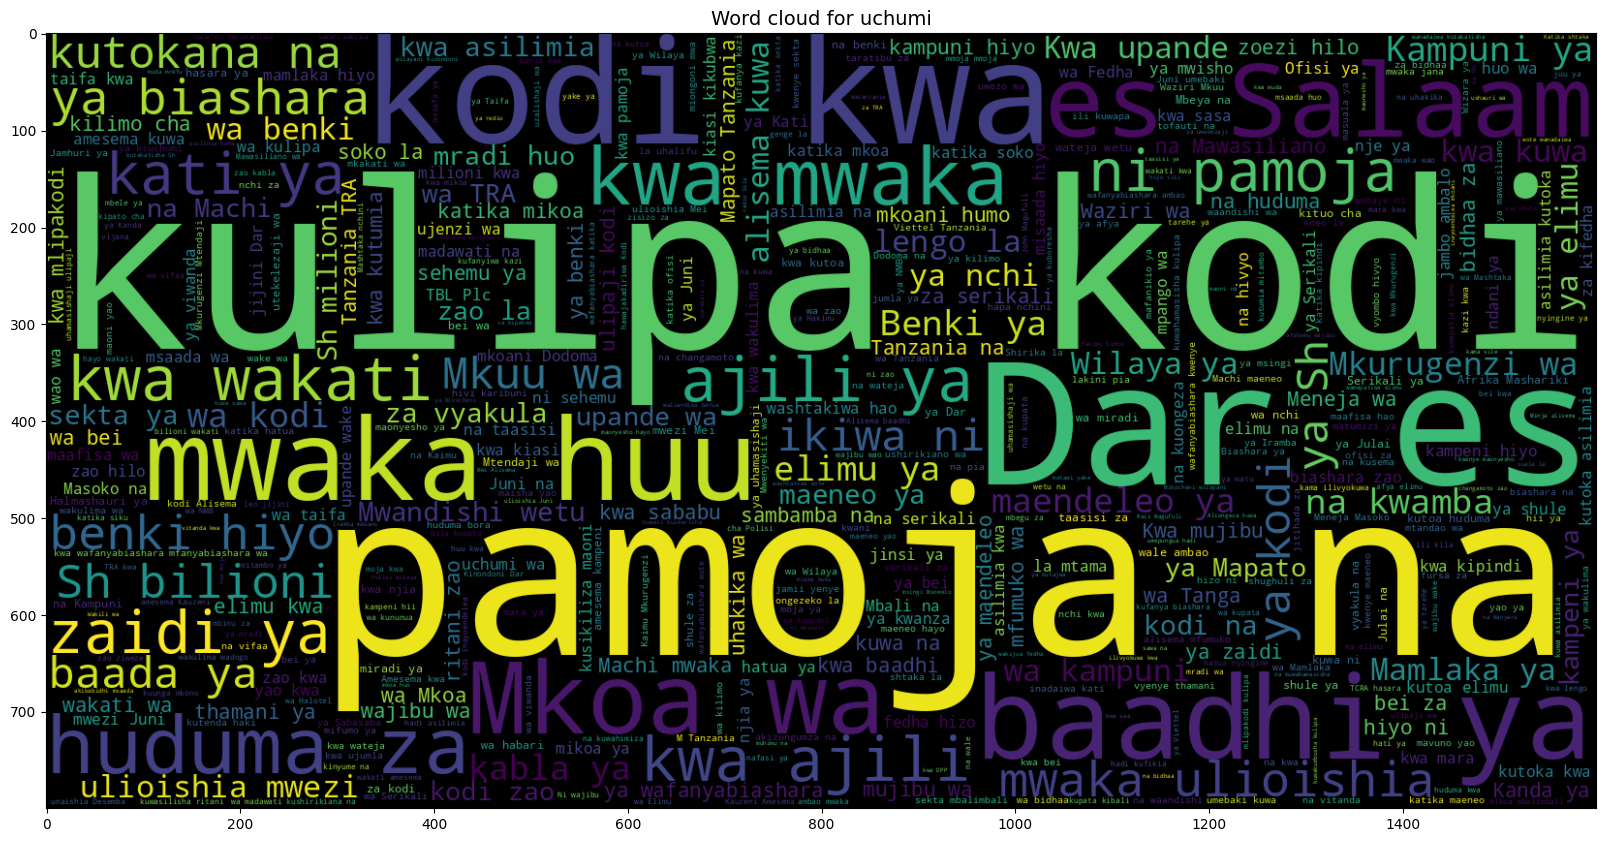

In [10]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_uchumi.content))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word cloud for uchumi",fontsize=14)

Text(0.5, 1.0, 'Word cloud for michezo')

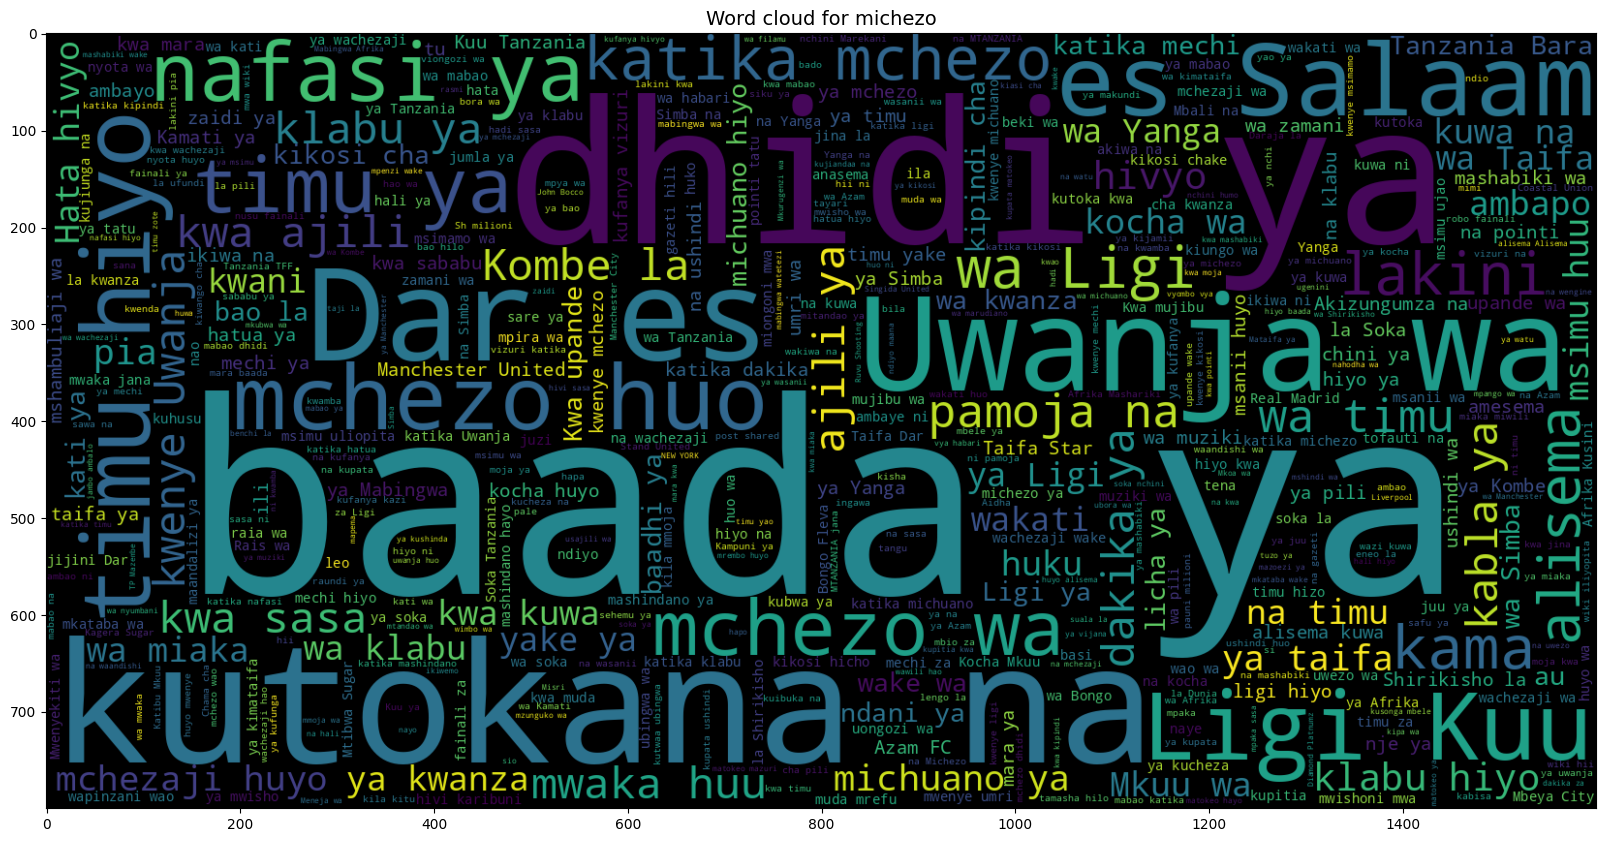

In [11]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_michezo.content))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word cloud for michezo",fontsize=14)

Text(0.5, 1.0, 'Word cloud for afya')

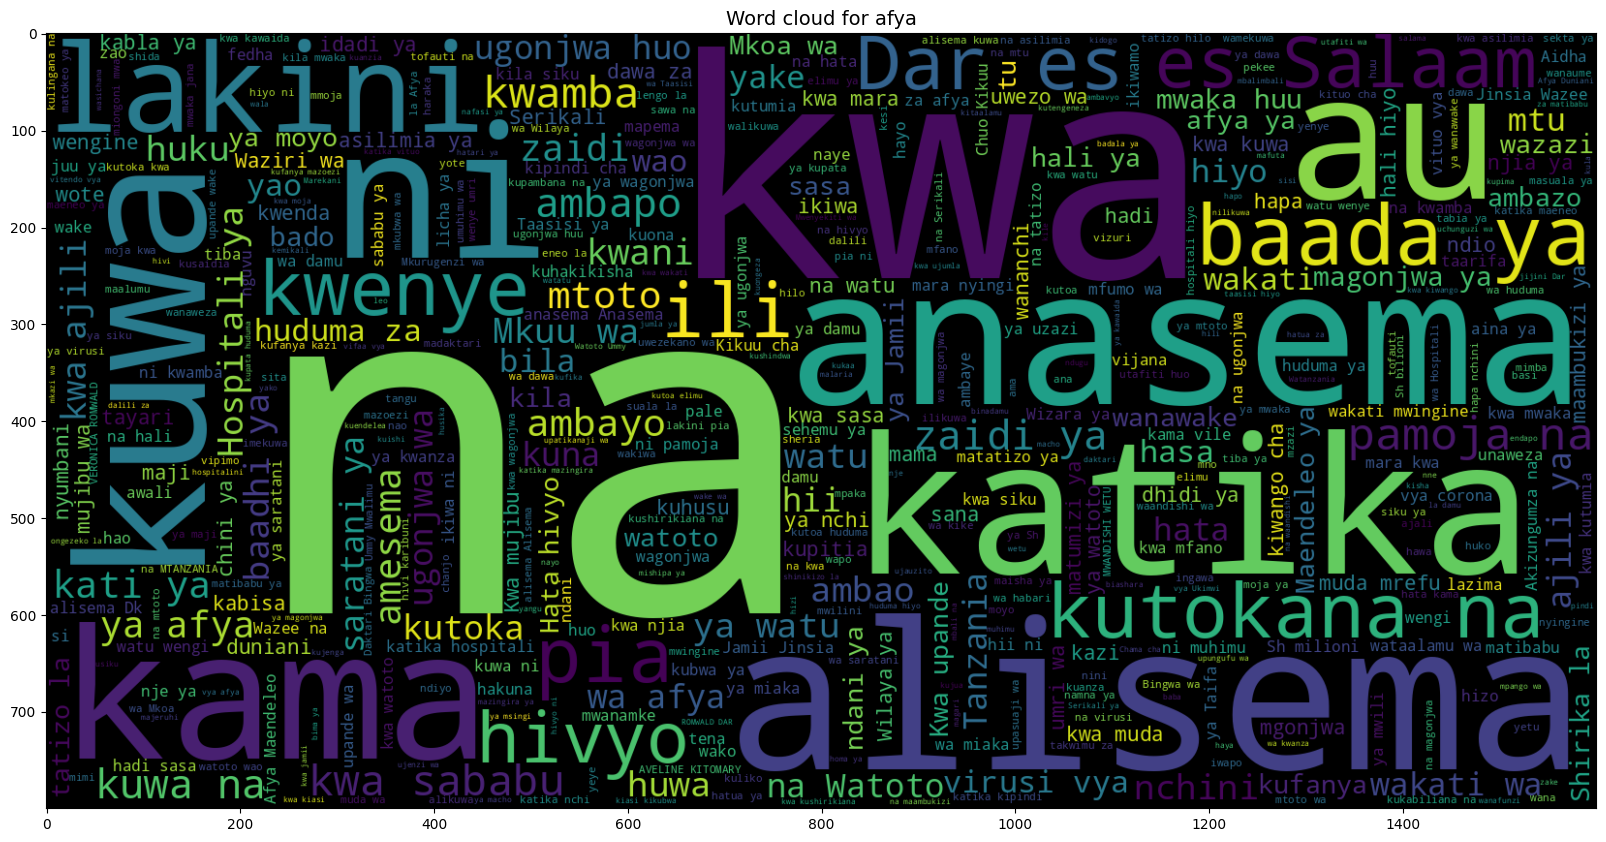

In [12]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_siasa.content))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word cloud for afya",fontsize=14)

#### Data preprocessing

In [13]:
X['content'][2]

'Mwandishi Wetu -Singida BENKI ya NMB imetoa msaada wa vifaa mbalimbali vyenye thamani ya zaidi ya Sh milioni 200 katika wilaya kadhaa nchini. Misaada iliyotolewa na benki hiyo inayoongoza kwa kutengeneza faida kati ya benki zote zinazofanya biashara humu nchini ndani ya miezi mitano mwaka huu, inahusisha vifaa vya ujenzi, madawati na vifaa vingine vinavyowezesha ukamilishaji wa miradi ya afya,elimu na usalama wa raia. Benki\xa0 ya NMB imeshatoa\xa0 msaada wa\xa0 vifaa vyenye thamani ya zaidi ya Sh milioni 200 kwa mikoa ya Kanda ya Kati. Akifafanua kuhusu misaada hiyo wakati akikabidhi msaada wa madawati na vitanda kwa baadhi ya shule katika Halmashauri ya Wilaya ya Iramba mkoani ingida, Meneja wa Kanda ya Kati wa NMB, Nsolo Mlozi, alibainisha kuwa misaada hiyo ya zaidi ya Sh milioni 200 iliyotolewa imelenga sekta ya elimu, afya\xa0 na majanga kwa mikoa mitatu ya\xa0 Kanda ya kati. Akikabidhi msaada wa madawati na vitanda kwa baadhi ya shule za Halmashauri ya Wilaya ya Iramba, MkoaniSi

In [14]:
X['content'][3]

' TIMU ya taifa ya Tanzania, Serengeti Boys jana ilijiweka katika nafasi fi nyu katika mashindano ya Mataifa ya Afrika kwa wachezaji wenye umri chini ya miaka 17 baada ya kuchapwa mabao 3-0 na Uganda kwenye Uwanja wa Taifa, Dar es Salaam.Uganda waliandika bao lao la kwanza katika dakika ya 15 lililofungwa na Kawooya Andrew akiunganisha wavuni krosi ya Najibu Viga huku lile la pili likifungwa na Asaba Ivan katika dakika ya 27 Najib Yiga.Serengeti Boys iliendelea kulala, Yiga aliifungia Uganda bao la tatu na la ushindi na kuifanya Serengeti kushika mkia katika Kundi A na kuacha simanzi kwa wapenzi wa soka nchini. Serengeti Boys inasubiri mchezo wa mwisho dhidi ya Senegal huku Nigeria ikisonga mbele baada ya kushinda mchezo wake wa awali kwenye uwanja huo na kufikisha pointi sita baada ya kushinda ule wa ufunguzi dhidi ya Tanzania.'

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [17]:
X['maelezo'] = X['content'].apply(lambda x: remove_punctuation(x))
X.head()

,content,category,maelezo
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi,Bodi ya Utalii Tanzania TTB imesema itafanya ...
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi,Mwandishi Wetu Singida BENKI ya NMB imetoa msa...
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo,TIMU ya taifa ya Tanzania Serengeti Boys jana...
7,['Huenda Manchester United ikasubiri ukaguzi w...,michezo,Huenda Manchester United ikasubiri ukaguzi wa ...
8,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi,SHIRIKA la Bima la Taifa NIC linakuja na Bima...


#### Stop words

In [18]:
from NoelNLP import stopList
stop_words = stopList()
print(stop_words)

['na', 'lakini', 'ingawa', 'ingawaje', 'kwa', 'sababu', 'hadi', 'hata', 'kama', 'ambapo', 'ambamo', 'ambako', 'ambacho', 'ambao', 'ambaye', 'ilhali', 'ya', 'yake', 'yao', 'yangu', 'yetu', 'yenu', 'vya', 'vyao', 'vyake', 'vyangu', 'vyenu', 'vyetu', 'yako', 'hizo', 'mimi', 'sisi', 'wewe', 'nyinyi', 'yeye', 'wao', 'nao', 'nasi', 'nanyi', 'ni', 'alikuwa', 'atakuwa', 'hii', 'hizi', 'zile', 'ile', 'hivi', 'vile', 'za', 'zake', 'zao', 'zenu', 'kwenye', 'katika', 'kwao', 'kwenu', 'kwetu', 'dhidi', 'kati', 'miongoni', 'katikati', 'wakati', 'kabla', 'baada', 'baadaye', 'nje', 'tena', 'mbali', 'halafu', 'hapa', 'pale', 'mara', 'yoyote', 'wowote', 'chochote', 'vyovyote', 'yeyote', 'lolote', 'mwenye', 'mwenyewe', 'lenyewe', 'lenye', 'wote', 'lote', 'vyote', 'nyote', 'kila', 'zaidi', 'hapana', 'ndiyo', 'au', 'ama', 'sio', 'siye', 'tu', 'budi', 'nyingi', 'nyingine', 'wengine', 'mwingine', 'zingine', 'lingine', 'kingine', 'chote', 'sasa', 'basi', 'bila', 'cha', 'chini', 'hapo', 'huku', 'kule', 'humu',

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [20]:
from bs4 import BeautifulSoup
import re

In [21]:
def maelezo_to_words(raw_maelezo):
    
    # 1. Delete HTML
    maelezo_text = BeautifulSoup(raw_maelezo, 'html.parser').get_text()
    
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]',' ', maelezo_text)
    
    # 3. Lower letters
    words = letters_only.lower().split()
    
    # 4. Stopwords
    meaningful_words = [w for w in words if not w in stop_words]
    
    # 5. Lemmatization
    lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    
    # 6. Space join words
    return( ' '.join(lemmatize_words))

In [22]:
X['maelezo_clean'] = X['maelezo'].apply(maelezo_to_words)

In [23]:
X.head()

,content,category,maelezo,maelezo_clean
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi,Bodi ya Utalii Tanzania TTB imesema itafanya ...,bodi utalii tanzania ttb imesema itafanya misa...
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi,Mwandishi Wetu Singida BENKI ya NMB imetoa msa...,mwandishi wetu singida benki nmb imetoa msaada...
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo,TIMU ya taifa ya Tanzania Serengeti Boys jana...,timu taifa tanzania serengeti boy jana ilijiwe...
7,['Huenda Manchester United ikasubiri ukaguzi w...,michezo,Huenda Manchester United ikasubiri ukaguzi wa ...,huenda manchester united ikasubiri ukaguzi mch...
8,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi,SHIRIKA la Bima la Taifa NIC linakuja na Bima...,shirika bima taifa nic linakuja bima kilimo it...


In [24]:
X_feat = X['maelezo_clean']
y = X['category']
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify = y, test_size=0.2, random_state=0)

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

### Bags of words

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words = stopList())
print(count_vectorizer)

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

CountVectorizer(stop_words=['na', 'lakini', 'ingawa', 'ingawaje', 'kwa',
                            'sababu', 'hadi', 'hata', 'kama', 'ambapo',
                            'ambamo', 'ambako', 'ambacho', 'ambao', 'ambaye',
                            'ilhali', 'ya', 'yake', 'yao', 'yangu', 'yetu',
                            'yenu', 'vya', 'vyao', 'vyake', 'vyangu', 'vyenu',
                            'vyetu', 'yako', 'hizo', ...])


/home/zaraste/demo/notebookenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ng'] not in stop_words.
  warnings.warn(


In [28]:
count_train

<8896x112285 sparse matrix of type '<class 'numpy.int64'>'
	with 1097891 stored elements in Compressed Sparse Row format>

### Machine learning model : Naive Bayes

accuracy:  0.9797661870503597
Confusion matrix without normalization


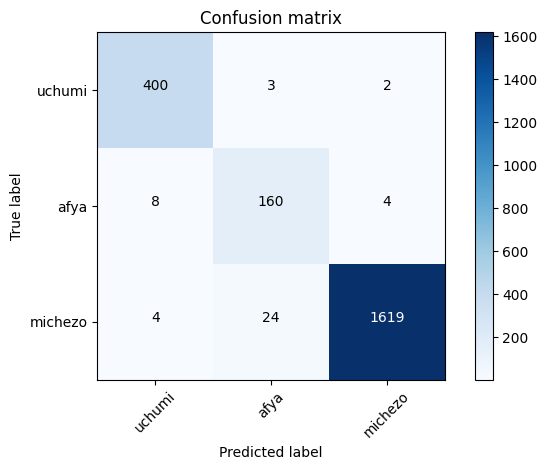

In [29]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
import itertools    



mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: ", score)

cm = metrics.confusion_matrix(y_test, pred, labels = ['uchumi', 'afya','michezo'])
plot_confusion_matrix(cm, classes=['uchumi','afya','michezo'])

### Machine learning model : Passive Aggressive Classifier 

accuracy:  0.983363309352518
Confusion matrix without normalization


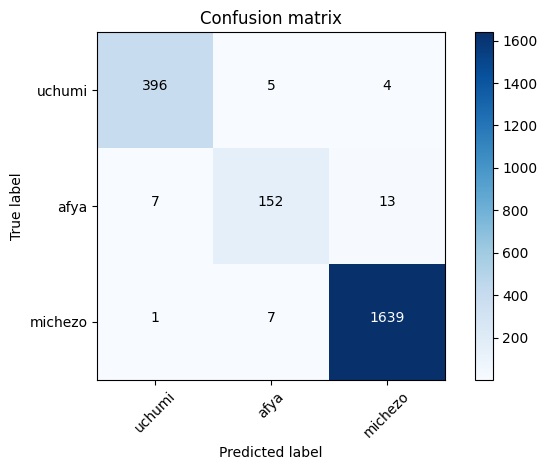

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: ", score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['uchumi', 'afya','michezo'])
plot_confusion_matrix(cm, classes=['uchumi','afya','michezo'])

### TFIDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopList(), max_df = 0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

/home/zaraste/demo/notebookenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ng'] not in stop_words.
  warnings.warn(


### Machine learning model : Naive Bayes

accuracy:  0.8785971223021583
Confusion matrix without normalization


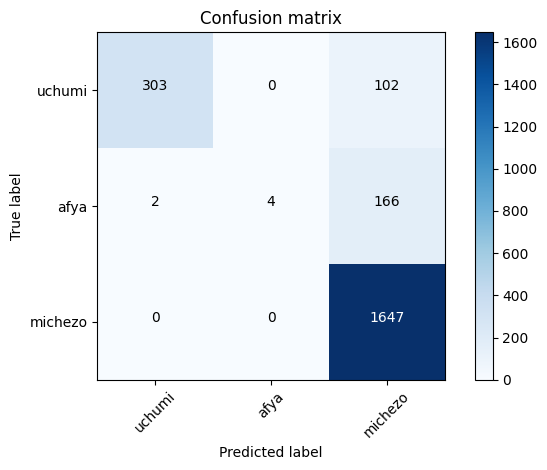

In [32]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: " , score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['uchumi', 'afya','michezo'])
plot_confusion_matrix(cm, classes=['uchumi','afya','michezo'])

### Machine learning model TFIDF

/home/zaraste/demo/notebookenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ng'] not in stop_words.
  warnings.warn(


accuracy:  0.9847122302158273
Confusion matrix without normalization
  (0, 80392)	0.04586810785483672
  (0, 10705)	0.03171618480958627
  (0, 38215)	0.06491450556165494
  (0, 73975)	0.06724476192900658
  (0, 43216)	0.029219595908257043
  (0, 65646)	0.01773223039680817
  (0, 15465)	0.022328215903153432
  (0, 59370)	0.022862242981440677
  (0, 29664)	0.06491450556165494
  (0, 103404)	0.048593569907933724
  (0, 75043)	0.028928542689065546
  (0, 60324)	0.031179772968369105
  (0, 55769)	0.025173744744962052
  (0, 52713)	0.017978121075301987
  (0, 79173)	0.03264088447489681
  (0, 31754)	0.05982270641439701
  (0, 38244)	0.03447195285853521
  (0, 43304)	0.02660424447555052
  (0, 32800)	0.05420813816116537
  (0, 43194)	0.06098183895687744
  (0, 42921)	0.07052907381488659
  (0, 56628)	0.03650088284434346
  (0, 38383)	0.04144612068346271
  (0, 42420)	0.04220697873554821
  (0, 40444)	0.022301891181329872
  :	:
  (8895, 99613)	0.04319215620400353
  (8895, 15465)	0.0358326961173103
  (8895, 75043)	0.0

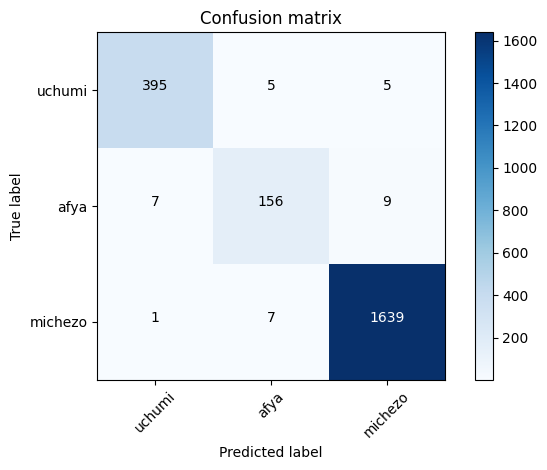

In [33]:
tfidf_vectorizer = TfidfVectorizer(stop_words = stopList(), max_df = 0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: " ,score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['uchumi', 'afya','michezo'])
plot_confusion_matrix(cm, classes=['uchumi','afya','michezo'])
print(tfidf_train)


/home/zaraste/demo/notebookenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ng'] not in stop_words.
  warnings.warn(


accuracy:  0.9851618705035972
Confusion matrix without normalization


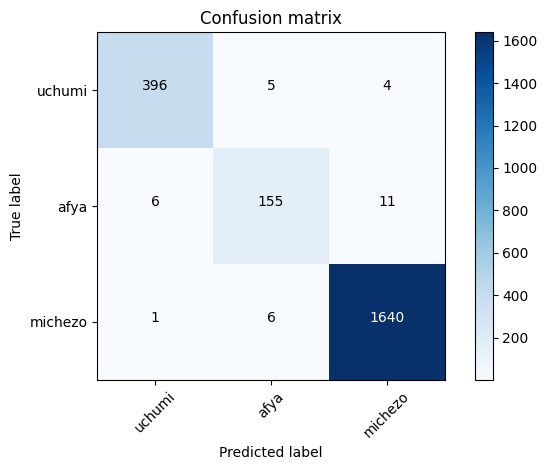

In [34]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words = stopList(), max_df = 0.8)
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: " ,score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['uchumi', 'afya','michezo'])
plot_confusion_matrix(cm, classes=['uchumi','afya','michezo'])

In [35]:
X.head()

,content,category,maelezo,maelezo_clean
0,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi,Bodi ya Utalii Tanzania TTB imesema itafanya ...,bodi utalii tanzania ttb imesema itafanya misa...
2,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi,Mwandishi Wetu Singida BENKI ya NMB imetoa msa...,mwandishi wetu singida benki nmb imetoa msaada...
3,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo,TIMU ya taifa ya Tanzania Serengeti Boys jana...,timu taifa tanzania serengeti boy jana ilijiwe...
7,['Huenda Manchester United ikasubiri ukaguzi w...,michezo,Huenda Manchester United ikasubiri ukaguzi wa ...,huenda manchester united ikasubiri ukaguzi mch...
8,SHIRIKA la Bima la Taifa (NIC) linakuja na Bi...,uchumi,SHIRIKA la Bima la Taifa NIC linakuja na Bima...,shirika bima taifa nic linakuja bima kilimo it...


### Sample prediction

In [36]:
text = ["michezo"]
test = tfidf_vectorizer2.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'michezo'

In [37]:
import joblib
joblib.dump(tfidf_vectorizer2, 'tfidfvectorizer.pk1')
joblib.dump(pass_tf,'passmodel.pk1')

['passmodel.pk1']

In [39]:
vectorizer = joblib.load('tfidfvectorizer.pk1')
model = joblib.load('passmodel.pk1')

test = model.predict(vectorizer.transform(['simba imeifunga yanga mabao sita']))
test[0]

'michezo'